# Capstone Project-5
## Domain:
- Marketing for Financial Services
## Title:
- Exploratory Data Analysis and Predictive Modeling for Marketing Term-Deposit Scheme in the Financial Services Industry
## About:
- DB Bank is a large public sector bank that has branches across the cities. It provides various services like savings accounts, current accounts, term deposits, personal loans, home loans, etc. to customers. Whenever the bank conducts marketing on its new schemes, it will keep track of data related to customers’ personal, social, and economic details. Also, it maintains the detailing of efforts made to achieve success in the campaign. Recently, the bank has conducted a campaign to market its term-deposit scheme. Campaigns were conducted based mostly on direct phone calls, soliciting the bank's customers to place  a term deposit. After all the marketing efforts, if the client had agreed to place a deposit, then the campaign is a success, otherwise not (Target variable marked 'yes', or 'no').

## Checkpoint 1

### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats


### Loading dataset

In [2]:
# Load the data from CSV files
city_master_df = pd.read_csv('City_Master.csv')
customer_details_df = pd.read_csv('Customer_and_bank details_p1.csv')
customer_campaign_df = pd.read_csv('Customer_campaign_details_p1.csv')
customer_postal_code_df = pd.read_csv('Customer_Postal_Code_details.csv')
customer_response_df = pd.read_csv('Customer_Response_data_p1.csv')
customer_social_economic_df = pd.read_csv('Customer_social_economic_data_p1.csv')
region_code_master_df = pd.read_csv('Region_code_master.csv')
state_master_df = pd.read_csv('State_Master.csv')

#### Dataset that we have

### Initial Analysis

In [3]:
city_master_df.head()

,City_Code,City_Name,State_Code
0,C1,Henderson,S1
1,C2,Los Angeles,S2
2,C3,Fort Lauderdale,S3
3,C4,Concord,S4
4,C5,Seattle,S5


In [4]:
customer_details_df.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code
0,1,56,services,married,high.school,no,no,yes,3,S1,C1
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1
2,3,59,admin.,married,professional.course,no,no,no,4,S2,C2
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3
4,5,24,technician,single,professional.course,no,yes,no,3,S3,C3


In [5]:
customer_campaign_df.head()

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,telephone,may,mon,307,1,999,0,nonexistent
1,2,telephone,may,mon,198,1,999,0,nonexistent
2,3,telephone,may,mon,139,1,999,0,nonexistent
3,4,telephone,may,mon,217,1,999,0,nonexistent
4,5,telephone,may,mon,380,1,999,0,nonexistent


In [6]:
customer_postal_code_df.head()

,customer_id,Postal Code
0,1,42420
1,2,42420
2,3,90036
3,4,33311
4,5,33311


In [7]:
customer_response_df.head()

,Customer_id,y
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [8]:
customer_social_economic_df.head()

,Customer_id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,1.1,93.994,-36.4,4.857,5191.0
1,2,1.1,93.994,-36.4,4.857,5191.0
2,3,1.1,93.994,-36.4,4.857,5191.0
3,4,1.1,93.994,-36.4,4.857,5191.0
4,5,1.1,93.994,-36.4,4.857,5191.0


In [9]:
region_code_master_df.head()

,Region_Name,Region_Code
0,Central,1
1,East,2
2,South,3
3,West,4
4,North,5


In [10]:
state_master_df.head()

,State_Code,State_Name,Region_Code
0,S1,Kentucky,3
1,S2,California,4
2,S3,Florida,3
3,S4,North Carolina,3
4,S5,Washington,4


Before we start with *data exploration* we might want to merge the dataframes into one or two dataframes. After looking through the csv files we decided to merge the dataframes in the following manner:

In [11]:
# rename customer_id coloumn of customer_postal_code to Customer_id
customer_postal_code_df = customer_postal_code_df.rename(columns={"customer_id":"Customer_id"})
customer_postal_code_df

,Customer_id,Postal Code
0,1,42420
1,2,42420
2,3,90036
3,4,33311
4,5,33311
...,...,...
37079,37080,10009
37080,37081,10011
37081,37082,10009
37082,37083,85254


In [12]:
customer_social_economic_df

,Customer_id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,1.1,93.994,-36.4,4.857,5191.0
1,2,1.1,93.994,-36.4,4.857,5191.0
2,3,1.1,93.994,-36.4,4.857,5191.0
3,4,1.1,93.994,-36.4,4.857,5191.0
4,5,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...
37079,37080,-1.1,94.767,-50.8,1.028,4963.6
37080,37081,-1.1,94.767,-50.8,1.028,4963.6
37081,37082,-1.1,94.767,-50.8,1.028,4963.6
37082,37083,-1.1,94.767,-50.8,1.028,4963.6


In [13]:
customer_social_economic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   emp.var.rate    37084 non-null  float64
 2   cons.price.idx  37084 non-null  float64
 3   cons.conf.idx   37084 non-null  float64
 4   euribor3m       37084 non-null  float64
 5   nr.employed     37084 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.7 MB


In [14]:
customer_social_economic_df.isnull().sum()

Customer_id       0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [15]:
for column in customer_social_economic_df.columns:
	print(column," ",customer_social_economic_df[column].unique())
	print("---------------------------------------------------")

Customer_id   [    1     2     3 ... 37082 37083 37084]
---------------------------------------------------
emp.var.rate   [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
---------------------------------------------------
cons.price.idx   [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
---------------------------------------------------
cons.conf.idx   [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
---------------------------------------------------
euribor3m   [4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 

In [16]:
# merging
merged_customer_df = pd.merge(customer_details_df, customer_campaign_df, on='Customer_id', how='inner')
merged_customer_df = pd.merge(merged_customer_df, customer_postal_code_df, on='Customer_id', how='inner')
merged_customer_df = pd.merge(merged_customer_df, customer_social_economic_df, on='Customer_id', how='inner')
merged_customer_df = pd.merge(merged_customer_df, customer_response_df, on='Customer_id', how='inner')

merged_customer_df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,90036,1.1,93.994,-36.4,4.857,5191.0,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,10011,-1.1,94.767,-50.8,1.028,4963.6,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,no
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,85254,-1.1,94.767,-50.8,1.028,4963.6,yes


In [17]:
merged_customer_df.to_csv('merged_customer.csv')  # saving this dataframe in a separate csv file

In [18]:
area_merged_df = pd.merge(state_master_df, region_code_master_df, on='Region_Code', how='left')
area_merged_df = pd.merge(area_merged_df, city_master_df, on='State_Code', how='inner')

area_merged_df

,State_Code,State_Name,Region_Code,Region_Name,City_Code,City_Name
0,S1,Kentucky,3,South,C1,Henderson
1,S1,Kentucky,3,South,C103,Richmond
2,S1,Kentucky,3,South,C160,Florence
3,S1,Kentucky,3,South,C209,Murray
4,S1,Kentucky,3,South,C257,Bowling Green
...,...,...,...,...,...,...
526,S46,Idaho,4,West,C450,Pocatello
527,S46,Idaho,4,West,C461,Caldwell
528,S46,Idaho,4,West,C514,Twin Falls
529,S47,North Dakota,1,Central,C403,Fargo


In [19]:
area_merged_df.to_csv('area_details.csv')

### Data Exploration

In [20]:
merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [21]:
# summary of numeric features
merged_customer_df.describe()

,Customer_id,age,duration,campaign,pdays,previous,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,258.237946,2.569545,962.530849,0.172986,55202.625553,0.082669,93.576076,-40.505183,3.621668,5167.058664
std,10705.373028,10.432965,258.730909,2.770611,186.773063,0.495681,32057.300954,1.568997,0.578493,4.622045,1.733972,72.196605
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,1040.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,9271.750000,32.000000,102.000000,1.000000,999.000000,0.000000,23223.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,18542.500000,38.000000,180.000000,2.000000,999.000000,0.000000,56301.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,27813.250000,47.000000,319.250000,3.000000,999.000000,0.000000,90008.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,99301.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [22]:
# summary of non-numeric features
merged_customer_df.describe(include='object')

,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,contact,month,day_of_week,poutcome,y
count,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084
unique,12,4,8,3,3,3,5,49,531,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,4,S2,C21,cellular,may,thu,nonexistent,no
freq,9420,22479,10971,29382,19433,30561,11884,7427,3422,23522,12420,7778,32023,32876


In [23]:
merged_customer_df.shape

(37084, 26)

In [24]:
merged_customer_df[merged_customer_df.duplicated()].sum()

Customer_id         0
age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
Region_Code         0
State_Code          0
City_Code           0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
Postal Code         0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                   0
dtype: object

So we are dealing with a dataset that has 26 total features

### Data Cleaning

#### Dealing with missing values

In [25]:
merged_customer_df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,90036,1.1,93.994,-36.4,4.857,5191.0,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,10011,-1.1,94.767,-50.8,1.028,4963.6,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,no
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,85254,-1.1,94.767,-50.8,1.028,4963.6,yes


In [26]:
# direct checking of null values
merged_customer_df.isnull().sum()

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Postal Code       0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [27]:
# checking for a second time just to be sure
columns = merged_customer_df.columns

unknown_columns = []
for column in columns:
    unknown_count = (merged_customer_df[column] == 'unknown').sum()
    print(column, unknown_count)
    if unknown_count > 0:
        unknown_columns.append(column)


Customer_id 0
age 0
job 306
marital 72
education 1549
default 7700
housing 882
loan 882
Region_Code 0
State_Code 0
City_Code 0
contact 0
month 0
day_of_week 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
Postal Code 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


In [28]:
# these are our columns with unknown variables for which we need to impute them
unknown_columns

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [29]:
def missing(data, unknown_value='unknown'):
    total = (data == unknown_value).sum().sort_values(ascending=False)
    percent = ((data == unknown_value).sum() / data.shape[0] * 100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing(merged_customer_df)

,Total,Percent
default,7700,20.763672
education,1549,4.177004
housing,882,2.378384
loan,882,2.378384
job,306,0.825154
marital,72,0.194154
Customer_id,0,0.000000
pdays,0,0.000000
nr.employed,0,0.000000
euribor3m,0,0.000000


In [30]:
# we replace these unknown values with the mode as tere are only 2 yes for default and majority is no,
# so mode seems to be the appropriate approach 
merged_customer_df['default'].value_counts()

default
no         29382
unknown     7700
yes            2
Name: count, dtype: int64

In [31]:
# for the rest of the columns we impute the data using the median
for column in unknown_columns:
    mode = merged_customer_df[column].mode()
    merged_customer_df[column].replace(to_replace=['unknown'], value=mode, inplace=True)
missing(merged_customer_df)

,Total,Percent
Customer_id,0,0.0
age,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
Postal Code,0,0.0
poutcome,0,0.0
previous,0,0.0


#### Dealing with outliers

In [32]:
# looking for outliers in our numeric data
merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [33]:
numeric_columns = merged_customer_df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Customer_id', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'Postal Code', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

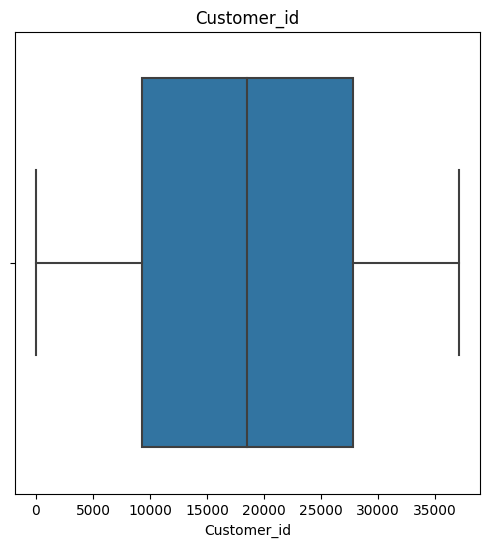

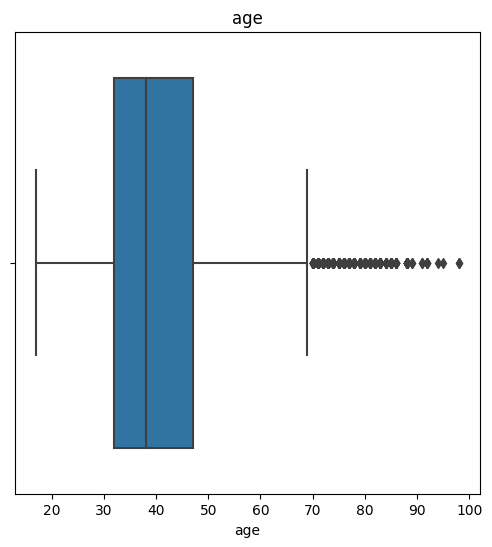

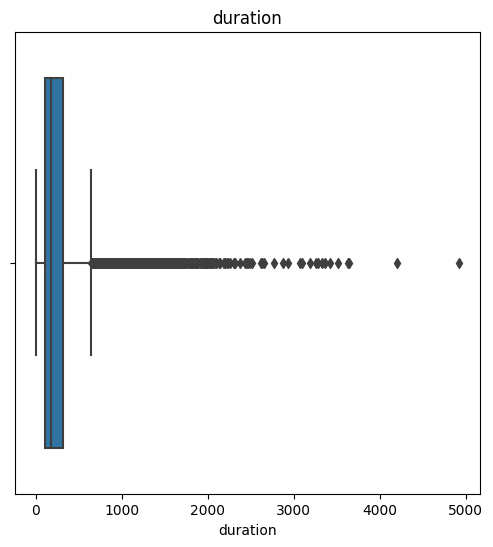

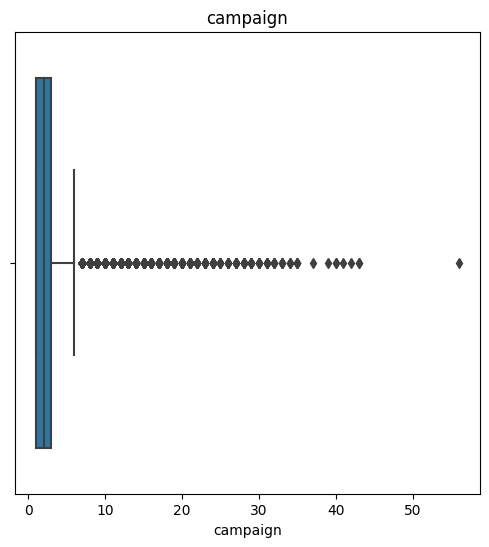

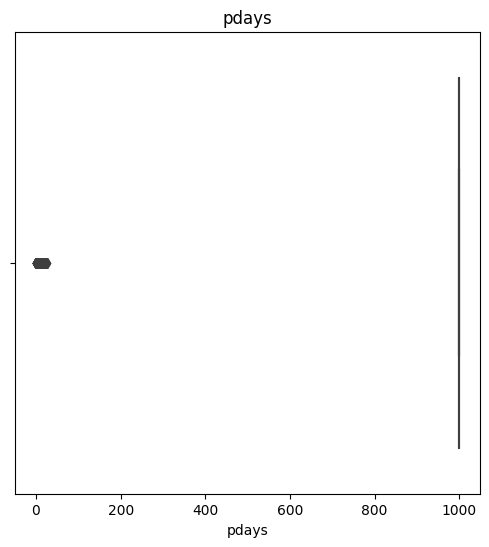

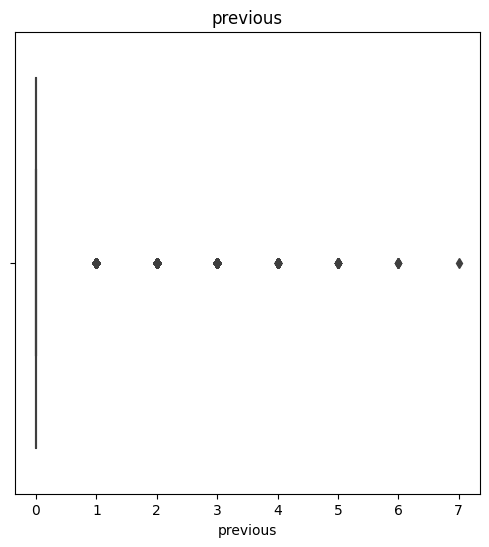

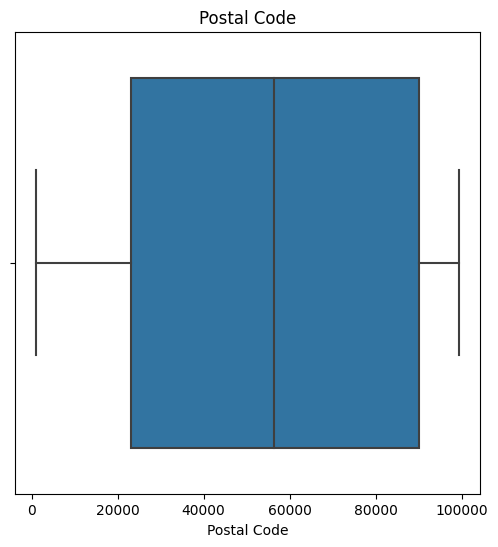

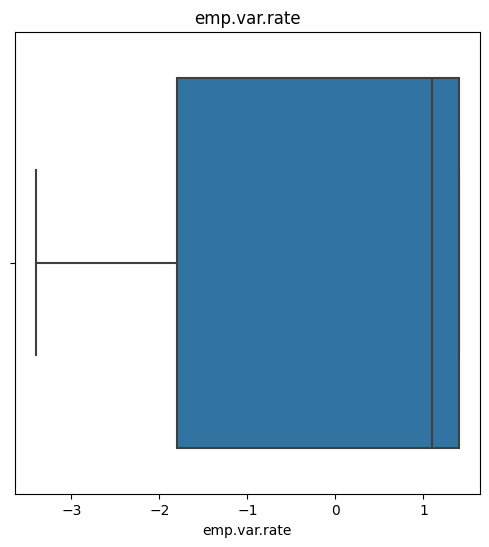

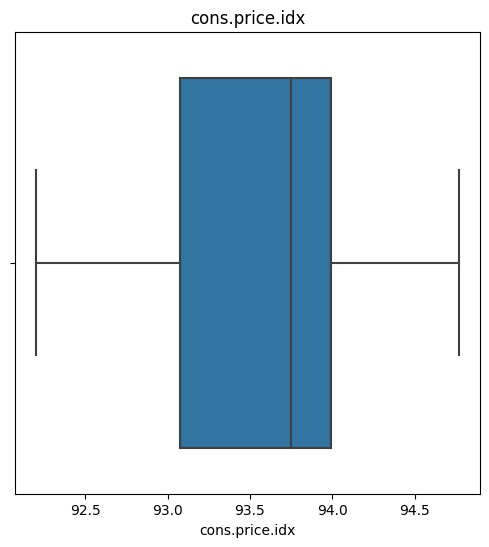

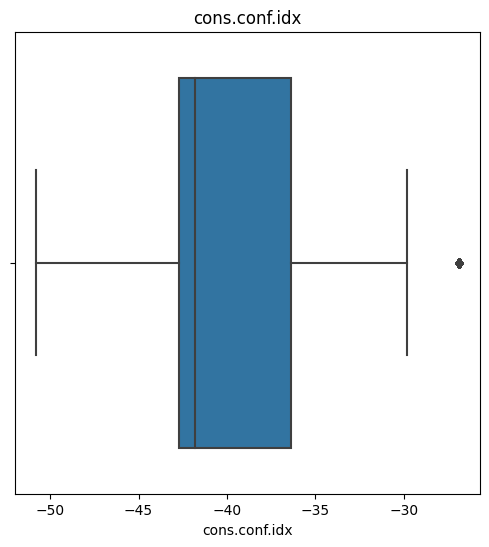

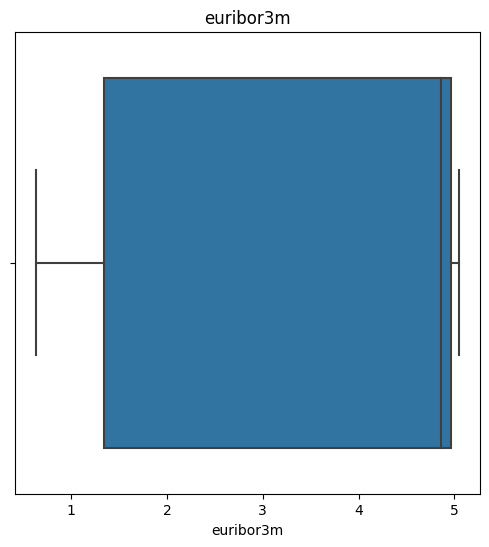

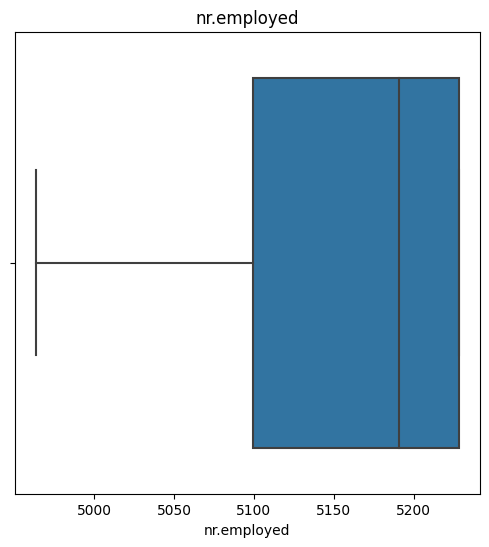

In [34]:
# visualizing outliers for the columns
for column in numeric_columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=merged_customer_df[column])
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.show()

In [35]:
# from eyeballing, we make a list of the columns that contain an outlier
outlier_columns = ['age', 'campaign', 'duration']

In [36]:
# Remove outliers using IQR method
for column in outlier_columns:
    Q1 = merged_customer_df[column].quantile(0.25)
    Q3 = merged_customer_df[column].quantile(0.75)
    IQR = Q3 - Q1
    merged_customer_df = merged_customer_df[(merged_customer_df[column] > Q1 - 1.5 * IQR) & (merged_customer_df[column] < Q3 + 1.5 * IQR)]

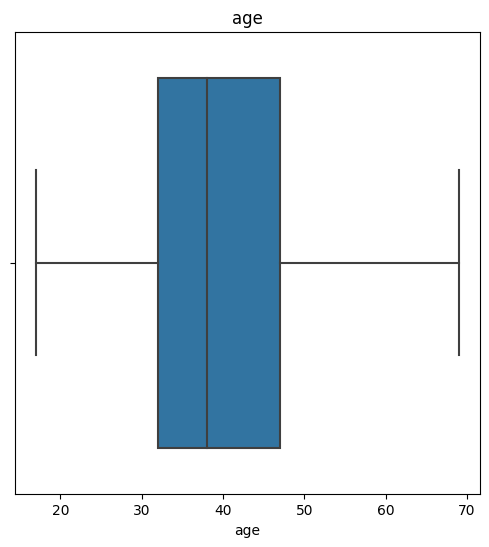

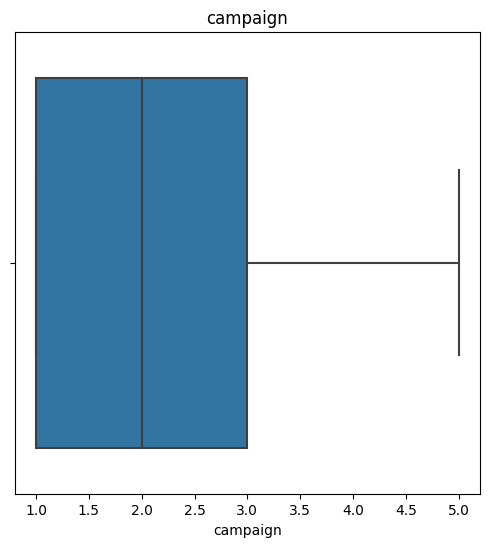

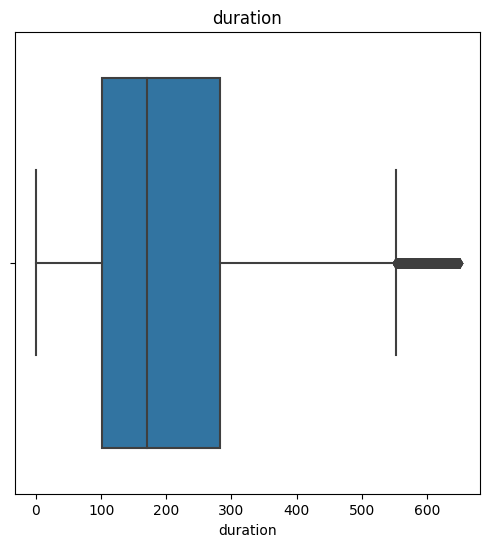

In [37]:
for column in outlier_columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=merged_customer_df[column])
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.show()

### Feature Engineering

#### Label Encoding 

In [38]:
merged_customer_df['y'] = merged_customer_df['y'].replace({'yes': 1, 'no': 0})
merged_customer_df['y']

0        0
1        0
2        0
3        0
4        0
        ..
37077    0
37078    1
37080    0
37081    0
37082    1
Name: y, Length: 31181, dtype: int64

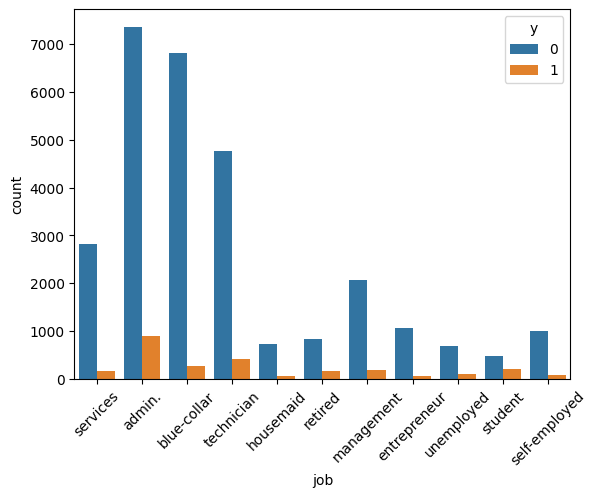

In [39]:
sns.countplot(x='job', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show()

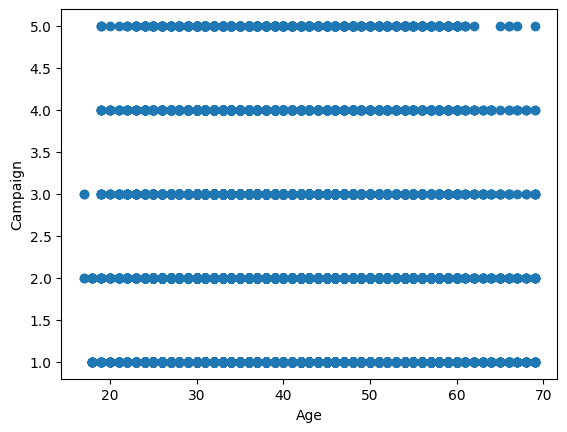

In [40]:
plt.scatter(x='age', y='campaign', data=merged_customer_df)
plt.xlabel('Age')
plt.ylabel('Campaign')
plt.show()

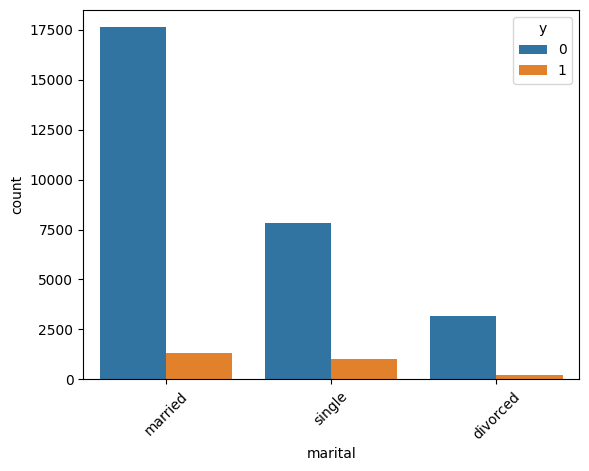

In [41]:
sns.countplot(x='marital', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show()

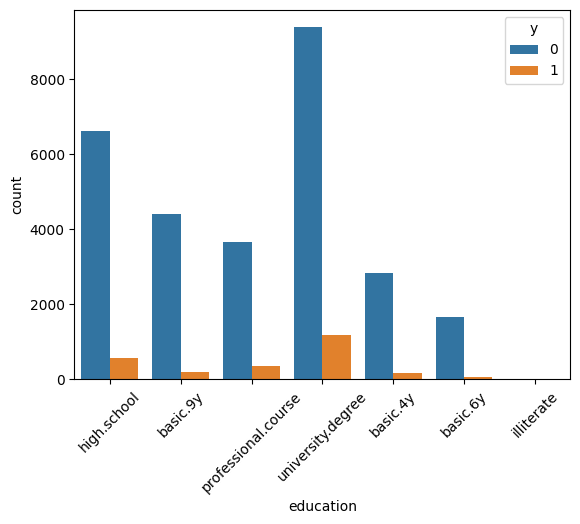

In [42]:
sns.countplot(x='education', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

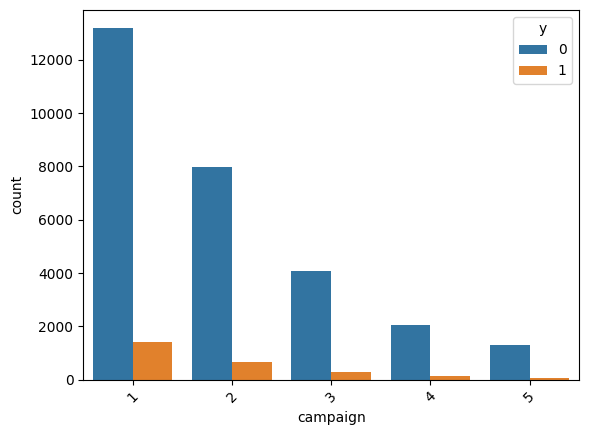

In [43]:
sns.countplot(x='campaign', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

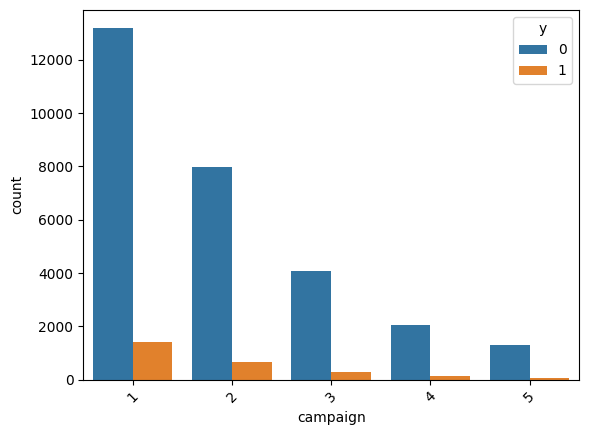

In [44]:
sns.countplot(x='campaign', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

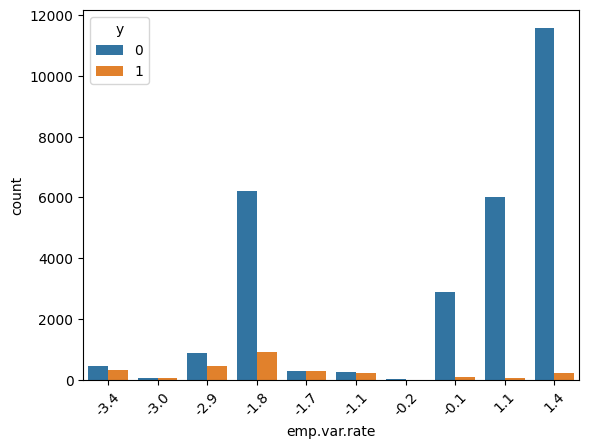

In [45]:
sns.countplot(x='emp.var.rate', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

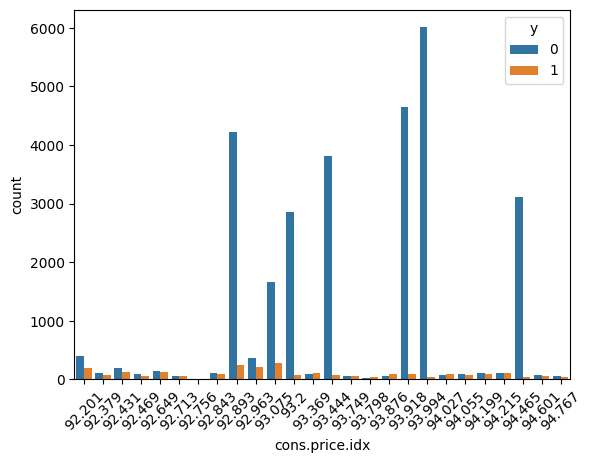

In [46]:
sns.countplot(x='cons.price.idx', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

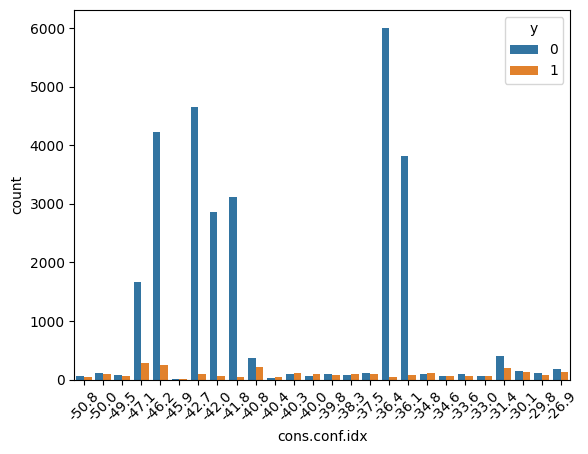

In [47]:
sns.countplot(x='cons.conf.idx', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show

In [48]:
columns

Index(['Customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'Region_Code', 'State_Code', 'City_Code', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'Postal Code', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [49]:
object_columns = []
for column in columns:
    if(merged_customer_df[column].dtype == 'object'):
        object_columns.append(column)
        
binary_columns = []
odinary_columns = []
for column in object_columns:
    if(merged_customer_df[column].unique().all() in ['yes','no']):
        binary_columns.append(column)
    else:
        odinary_columns.append(column)
    #print(column," - ", merged_customer_df[column].unique(), end="\n--------------------------------\n")
print(binary_columns,"\n",odinary_columns)

['default', 'housing', 'loan'] 
 ['job', 'marital', 'education', 'Region_Code', 'State_Code', 'City_Code', 'contact', 'month', 'day_of_week', 'poutcome']


In [50]:
for column in binary_columns:
    merged_customer_df[column] = merged_customer_df[column].replace({'yes':1,'no':0})
for column in binary_columns:
    print(column,"\t",merged_customer_df[column].unique())

default 	 [0 1]
housing 	 [0 1]
loan 	 [1 0]


In [51]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

merged_customer_df[odinary_columns] = ordinal_encoder.fit_transform(merged_customer_df[odinary_columns])

for column in odinary_columns:
    print(column," ",merged_customer_df[column].unique(),"\n----------------------------\n")

job   [ 7.  0.  1.  9.  3.  5.  4.  2. 10.  8.  6.] 
----------------------------

marital   [1. 2. 0.] 
----------------------------

education   [3. 2. 5. 6. 0. 1. 4.] 
----------------------------

Region_Code   [2. 3. 4. 0. 1.] 
----------------------------

State_Code   [ 0. 11. 22. 33. 44. 45. 46. 47. 48.  1.  2.  3.  4.  5.  6.  7.  8.  9.
 10. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43.] 
----------------------------

City_Code   [  0. 111. 222. 333. 444. 487. 498. 509. 520.   1.  12.  23.  34.  45.
  56.  67.  78.  89. 100. 112. 123. 134. 145. 156. 167. 178. 189. 200.
 211. 223. 234. 245. 256. 267. 278. 289. 300. 311. 322. 334. 345. 356.
 367. 378. 389. 400. 411. 422. 433. 445. 456. 467. 478. 481. 482. 483.
 484. 485. 486. 488. 489. 490. 491. 492. 493. 494. 495. 496. 497. 499.
 500. 501. 502. 504. 505. 506. 507. 508. 510. 511. 512. 513. 514. 515.
 516. 517. 518. 519. 522. 523. 524. 525. 526. 527. 528.

### EDA

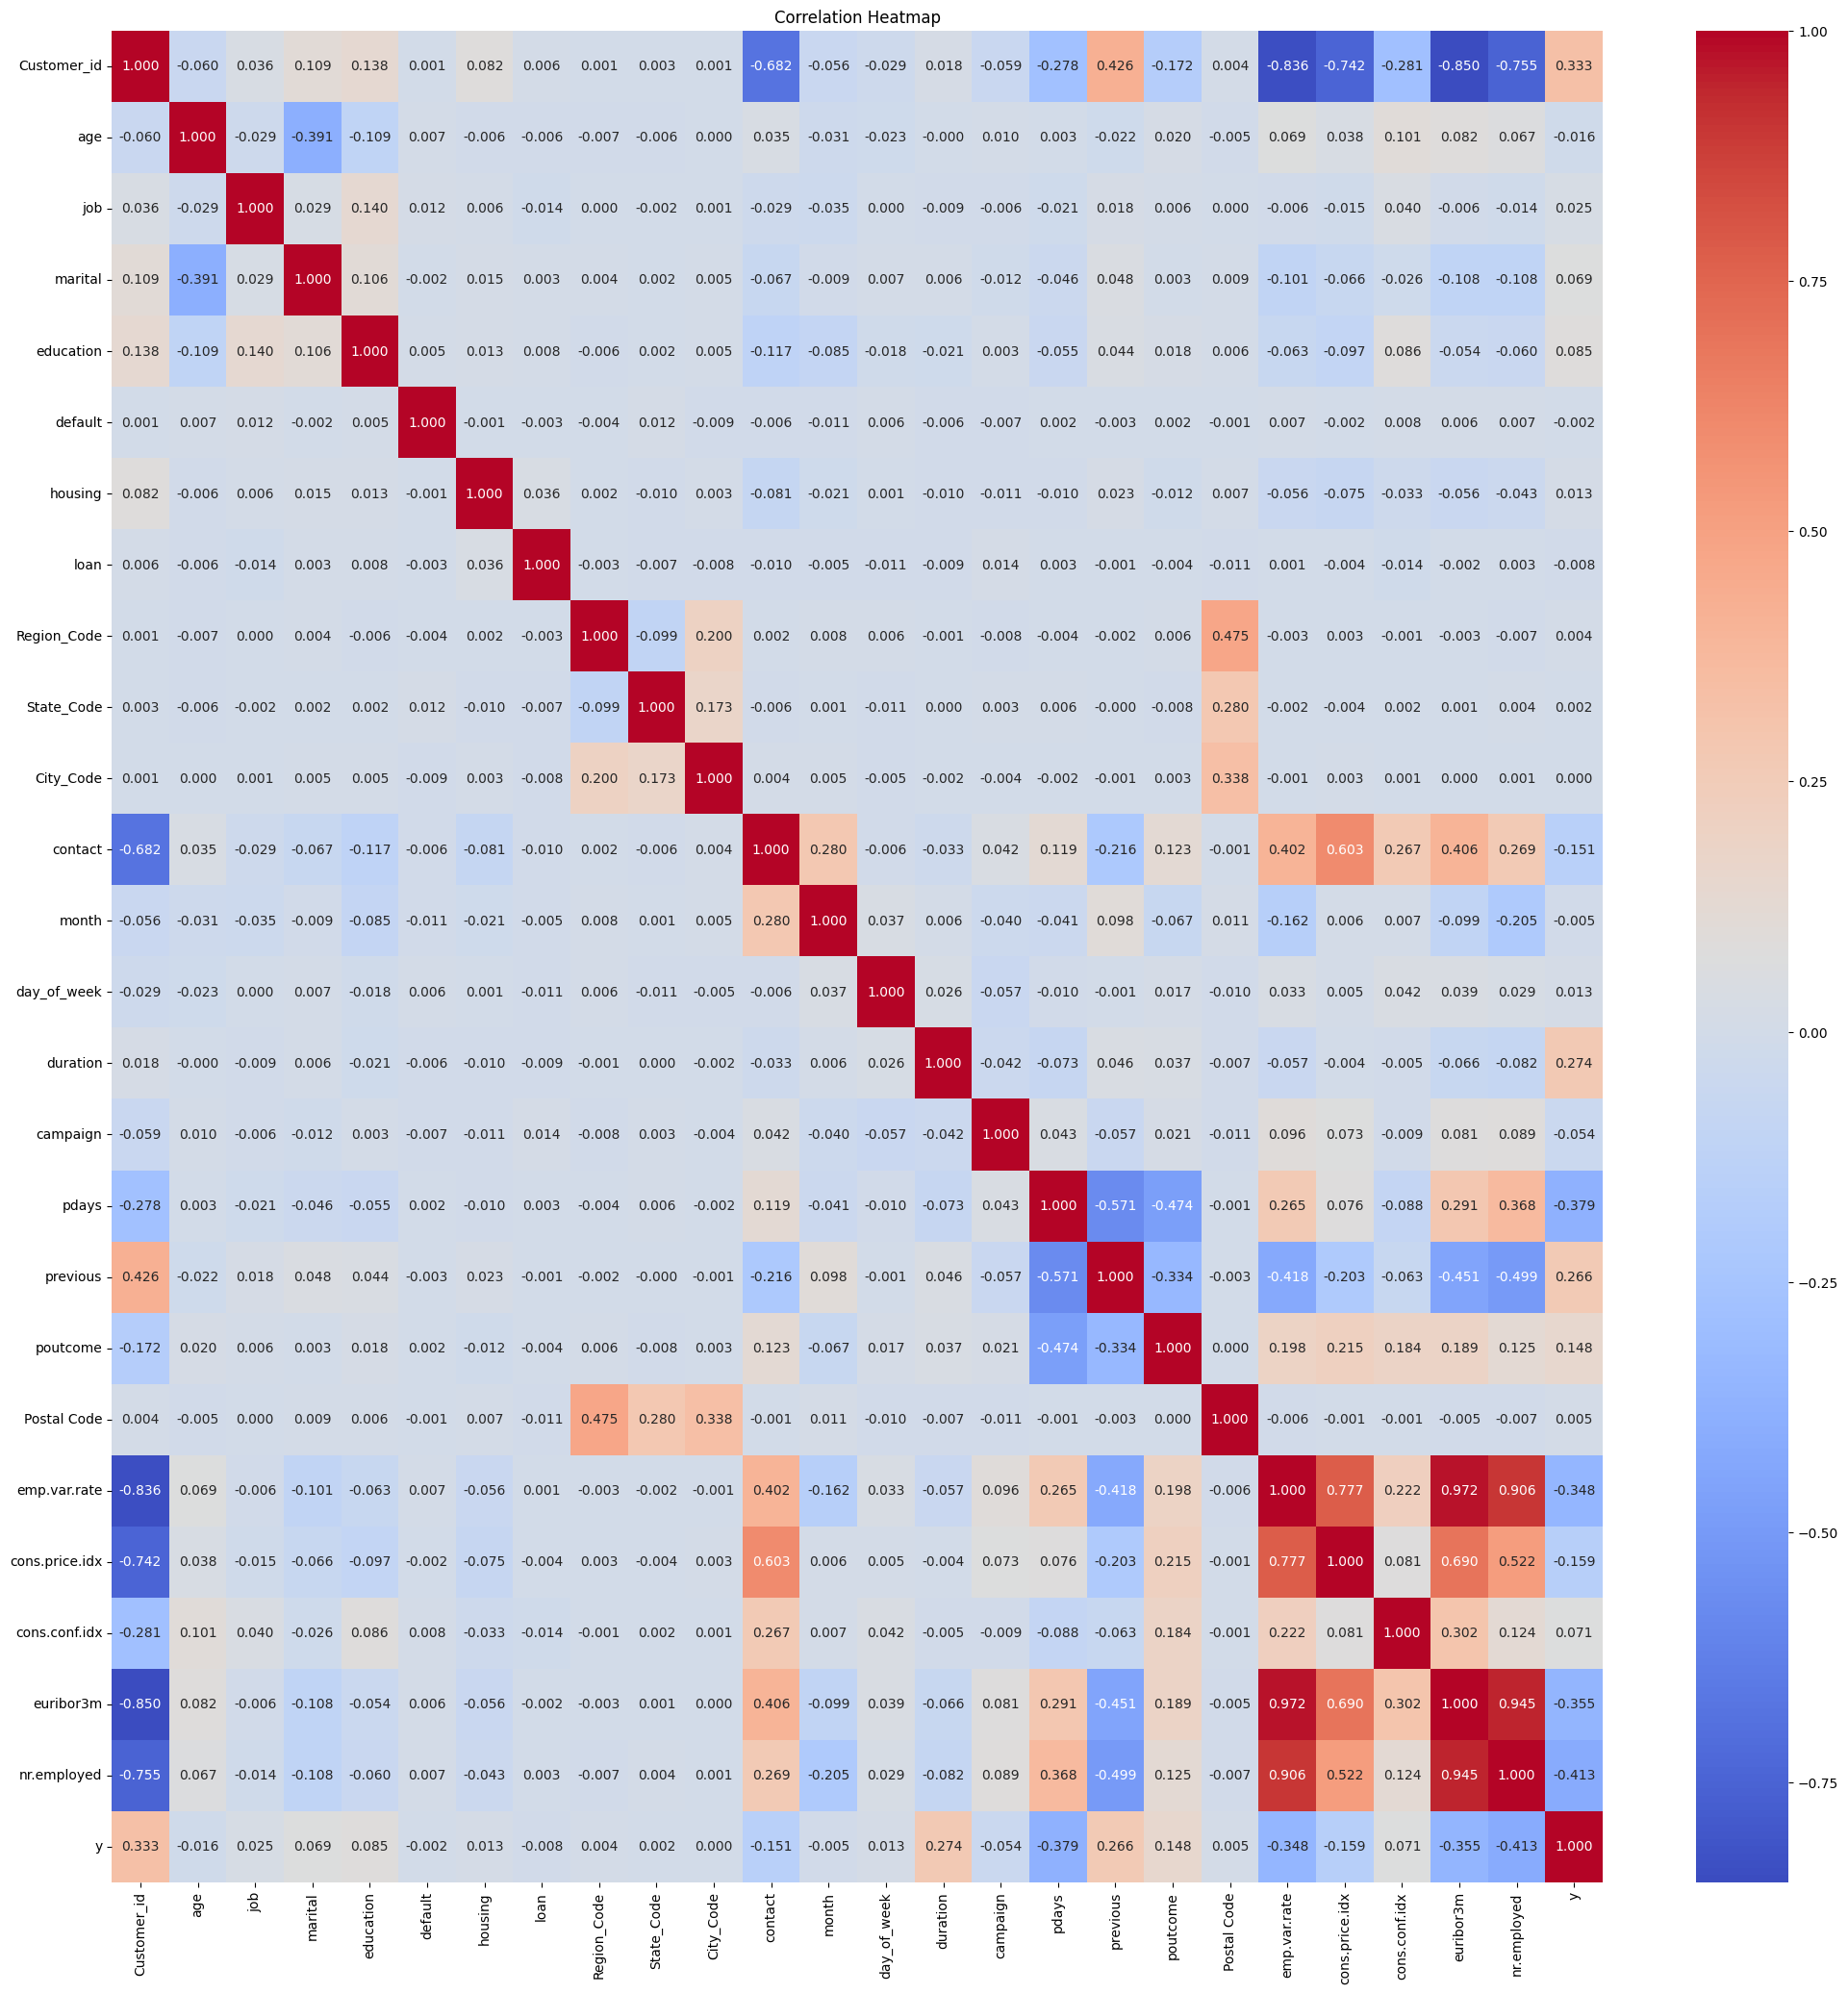

In [52]:
# Generate the heatmap
plt.figure(figsize=(25,25))
sns.heatmap(merged_customer_df.corr(), annot=True, cmap='coolwarm',fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

In [53]:
weakly_corelated_columns = ['default','Postal Code', 'Region_code', 'State_Code', 'City_Code', 'month']

In [54]:
columns

Index(['Customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'Region_Code', 'State_Code', 'City_Code', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'Postal Code', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### spliting of data

In [55]:
from sklearn.model_selection import train_test_split
# Separate features (X) and target (y)
X = merged_customer_df.drop(['y'], axis=1)
y = merged_customer_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Checkpoint 2

### Data Modelling

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Step 2: Initialize and train the logistic regression model
logreg_model =  LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Step 3: Make predictions on the testing set
y_pred = logreg_model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9344236010902678
Confusion Matrix:
 [[5621   93]
 [ 316  207]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      5714
           1       0.69      0.40      0.50       523

    accuracy                           0.93      6237
   macro avg       0.82      0.69      0.73      6237
weighted avg       0.93      0.93      0.93      6237



c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# second model of logitic regression 

In [57]:
columns

Index(['Customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'Region_Code', 'State_Code', 'City_Code', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'Postal Code', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

weakly_corelated_columns = ['default','Postal Code', 'Region_Code', 'State_Code', 'City_Code', 'month','Customer_id','y']
X = merged_customer_df.drop(weakly_corelated_columns, axis=1)
y = merged_customer_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model =  LogisticRegression(max_iter=5000)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)


# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9333012666346
Confusion Matrix:
 [[5615   99]
 [ 317  206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      5714
           1       0.68      0.39      0.50       523

    accuracy                           0.93      6237
   macro avg       0.81      0.69      0.73      6237
weighted avg       0.92      0.93      0.93      6237



# Gradient Boosting Classifier:
- Gradient Boosting is another ensemble method that performs well in a wide range of tasks. It builds multiple weak learners sequentially, and it often delivers high predictive accuracy. Gradient Boosting can be useful when you need a high-performing model with good generalization.

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gradient_boost_model = GradientBoostingClassifier()
gradient_boost_model.fit(X_train, y_train)

# Step 3: Make predictions on the testing set
y_pred = gradient_boost_model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9385922719256052
Confusion Matrix:
 [[5605  109]
 [ 274  249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      5714
           1       0.70      0.48      0.57       523

    accuracy                           0.94      6237
   macro avg       0.82      0.73      0.77      6237
weighted avg       0.93      0.94      0.93      6237

